In [482]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
import sqlite3

In [483]:
df = pd.read_csv("C:\\Users\\Dell\\Microsoft\\startupfunding\\startup_funding.csv", encoding='utf-8')

In [484]:
print("First 5 rows of data:")
display(df.head())

First 5 rows of data:


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [485]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [486]:
print(f"\nData has {df.shape[0]} rows and {df.shape[1]} columns.")


Data has 3044 rows and 10 columns.


In [487]:
 #Fix column names
df.columns =df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_')

In [488]:
#check column names 
print(df.columns.tolist())

['Sr_No', 'Date_dd_mm_yyyy', 'Startup_Name', 'Industry_Vertical', 'SubVertical', 'City__Location', 'Investors_Name', 'InvestmentnType', 'Amount_in_USD', 'Remarks']


In [489]:
df['Date_dd_mm_yyyy'] = df['Date_dd_mm_yyyy'].astype(str)

In [490]:
df['Date_dd_mm_yyyy'] = df['Date_dd_mm_yyyy'].str.replace('.', '/', regex=False)

In [491]:
df['Date_dd_mm_yyyy'] = df['Date_dd_mm_yyyy'].str.replace('//', '/', regex=False)

In [492]:
df['Date_dd_mm_yyyy'] = df['Date_dd_mm_yyyy'].str.replace('\\xc2\\xa0', '', regex=False)
df['Date_dd_mm_yyyy'] = df['Date_dd_mm_yyyy'].str.replace('\\xa0', '', regex=False)
df['Date_dd_mm_yyyy'] = df['Date_dd_mm_yyyy'].str.strip()
df['Date_dd_mm_yyyy'] = df['Date_dd_mm_yyyy'].replace(['nan', ''], pd.NA)



In [493]:
df['Original_Date'] = df['Date_dd_mm_yyyy'].copy()
df['Date_dd_mm_yyyy'] = pd.to_datetime(df['Date_dd_mm_yyyy'], errors='coerce', dayfirst=True)


In [494]:
invalid_dates = df[df['Date_dd_mm_yyyy'].isna()][['Sr_No', 'Date_dd_mm_yyyy', 'Startup_Name', 'Original_Date']]
print("Remaining invalid dates after conversion:")
print(invalid_dates)


Remaining invalid dates after conversion:
      Sr_No Date_dd_mm_yyyy                  Startup_Name    Original_Date
192     193             NaT                      Loan Tap        05/072018
2571   2572             NaT                     HandyHome        01/07/015
2606   2607             NaT  \\xc2\\xa0Infinity Assurance  \\xc2\10/7/2015


In [495]:
def clean_date(original_date):
    if pd.isna(original_date) or original_date == 'nan':
        return pd.NaT
    date_str = str(original_date).strip()
    date_str = date_str.replace('.', '/')
    date_str = date_str.replace('//', '/')
    date_str = date_str.replace('\xc2\xa0', '').replace('\xa0', '')
    try:
        return pd.to_datetime(date_str, dayfirst=True)
    except ValueError:
        return pd.NaT

df.loc[df['Date_dd_mm_yyyy'].isna(), 'Date_dd_mm_yyyy'] = df.loc[df['Date_dd_mm_yyyy'].isna(), 'Original_Date'].apply(clean_date)


In [496]:
df.loc[df['Sr_No'] == 193, 'Date_dd_mm_yyyy'] = pd.to_datetime('05/07/2018', dayfirst=True)


In [497]:
df.loc[df['Sr_No'] == 2572, 'Date_dd_mm_yyyy'] = pd.to_datetime('01/07/2015', dayfirst=True)

In [498]:
df.loc[df['Sr_No'] == 2607, 'Date_dd_mm_yyyy'] = pd.to_datetime('10/07/2015', dayfirst=True)

In [499]:
invalid_dates = df[df['Date_dd_mm_yyyy'].isna()][['Sr_No', 'Date_dd_mm_yyyy', 'Startup_Name', 'Original_Date']]
print("Remaining invalid dates after conversion:")
print(invalid_dates)

Remaining invalid dates after conversion:
Empty DataFrame
Columns: [Sr_No, Date_dd_mm_yyyy, Startup_Name, Original_Date]
Index: []


In [500]:
df.iloc[2571]

Sr_No                                                 2572
Date_dd_mm_yyyy                        2015-07-01 00:00:00
Startup_Name                                     HandyHome
Industry_Vertical    Hyperlocal Electronics repair Service
SubVertical                                            NaN
City__Location                                      Mumbai
Investors_Name              Bessemer Ventures, Kae Capital
InvestmentnType                               Seed Funding
Amount_in_USD                                     6,30,000
Remarks                                                NaN
Original_Date                                    01/07/015
Name: 2571, dtype: object

In [501]:
df['Startup_Name'] = df['Startup_Name'].astype(str)

In [502]:
df['Startup_Name'] = df['Startup_Name'].str.replace('\\xa0', '', regex=False)
df['Startup_Name'] = df['Startup_Name'].str.replace('\\xc2', '', regex=False)
df['Startup_Name'] = df['Startup_Name'].str.replace('\\', '', regex=False)
df['Startup_Name'] = df['Startup_Name'].str.replace('\\xe2', '', regex=False)
df['Startup_Name'] = df['Startup_Name'].str.replace('\\x80', '', regex=False)
df['Startup_Name'] = df['Startup_Name'].str.replace('\\x99s', '', regex=False)
df['Startup_Name'] = df['Startup_Name'].str.replace('xe2x80x99s', '', regex=False)
df['Startup_Name'] = df['Startup_Name'].str.replace('"', '', regex=False)
df['Startup_Name'] = df['Startup_Name'].str.strip().str.title()
df['Startup_Name'] = df['Startup_Name'].replace('nan', pd.NA)

In [503]:
df.iloc[144]

Sr_No                                145
Date_dd_mm_yyyy      2018-10-01 00:00:00
Startup_Name                   Northmist
Industry_Vertical                Fashion
SubVertical                    Mens Wear
City__Location                     Delhi
Investors_Name          Prashant Jaiswal
InvestmentnType      Seed/ Angel Funding
Amount_in_USD                        NaN
Remarks                              NaN
Original_Date                 01/10/2018
Name: 144, dtype: object

In [504]:
df['Industry_Vertical'] = df['Industry_Vertical'].astype(str)

In [505]:
df['Industry_Vertical'] = df['Industry_Vertical'].str.replace('\\xa0', '', regex=False)
df['Industry_Vertical'] = df['Industry_Vertical'].str.replace('\\xc2', '', regex=False)
df['Industry_Vertical'] = df['Industry_Vertical'].str.replace('\\', '', regex=False)
df['Industry_Vertical'] = df['Industry_Vertical'].str.strip().str.title()
df['Industry_Vertical'] = df['Industry_Vertical'].replace('nan', pd.NA)

In [506]:
df['SubVertical'] = df['SubVertical'].astype(str)

In [507]:
df['SubVertical'] = df['SubVertical'].str.replace('\\xa0', '', regex=False)
df['SubVertical'] = df['SubVertical'].str.replace('\\xc2', '', regex=False)
df['SubVertical'] = df['SubVertical'].str.replace('\\', '', regex=False)
df['SubVertical'] = df['SubVertical'].str.replace('\\n', '', regex=False)
df['SubVertical'] = df['SubVertical'].str.replace('"', '', regex=False)
df['SubVertical'] = df['SubVertical'].str.strip().str.title()
df['SubVertical'] = df['SubVertical'].replace('nan', pd.NA)

In [508]:
df['City__Location'] = df['City__Location'].astype(str)

In [509]:
df['City__Location'] = df['City__Location'].str.replace('\\xa0', '', regex=False)
df['City__Location'] = df['City__Location'].str.replace('\\xc2', '', regex=False)
df['City__Location'] = df['City__Location'].str.replace('\\', '', regex=False)
df['City__Location'] = df['City__Location'].str.title().replace({'bangalore': 'bengaluru', 'gurgaon': 'gurugram','ahemadabad':'ahmedabad','ahemdabad':'ahmedabad','bhubneswar':'bhubaneswar','kolkatta':'kolkata'})

In [515]:
df['City__Location'] = df['City__Location'].replace(r'^\s*$', 'NA', regex=True).fillna('NA')

In [516]:
print("First 5 rows of data:")
display(df.head())

First 5 rows of data:


,Sr_No,Date_dd_mm_yyyy,Startup_Name,Industry_Vertical,SubVertical,City__Location,Investors_Name,InvestmentnType,Amount_in_USD,Remarks,Original_Date
0,1,2020-01-09,Byju’S,E-Tech,E-Learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,09/01/2020
1,2,2020-01-13,Shuttl,Transportation,App Based Shuttle Service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,13/01/2020
2,3,2020-01-09,Mamaearth,E-Commerce,Retailer Of Baby And Toddler Products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,09/01/2020
3,4,2020-01-02,Https://Www.Wealthbucket.In/,Fintech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,02/01/2020
4,5,2020-01-02,Fashor,Fashion And Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,02/01/2020


In [517]:
df['Investors_Name'] = df['Investors_Name'].astype(str)

In [518]:
df['Investors_Name'] = df['Investors_Name'].str.replace('\\xa0', '', regex=False)
df['Investors_Name'] = df['Investors_Name'].str.replace('\\xc2', '', regex=False)
df['Investors_Name'] = df['Investors_Name'].str.replace('\\', '', regex=False)
df['Investors_Name'] = df['Investors_Name'].str.replace('"', '', regex=False)
df['Investors_Name'] = df['Investors_Name'].str.replace("'", '', regex=False)
df['Investors_Name'] = df['Investors_Name'].str.strip().str.title()
df['Investors_Name'] = df['Investors_Name'].replace('nan', pd.NA)

In [519]:
df['Investors_Name'] = df['Investors_Name'].replace(r'^\s*$', 'NA', regex=True).fillna('NA')

In [520]:
df['InvestmentnType'] = df['InvestmentnType'].astype(str)

In [521]:
df['InvestmentnType'] = df['InvestmentnType'].replace(r'^\s*$', 'NA', regex=True).fillna('NA')

In [522]:
df['Amount_in_USD'] = df['Amount_in_USD'].astype(str)

In [523]:
df['Amount_in_USD'] = df['Amount_in_USD'].str.replace('\\xa0', '', regex=False)
df['Amount_in_USD'] = df['Amount_in_USD'].str.replace('\\xc2', '', regex=False)
df['Amount_in_USD'] = df['Amount_in_USD'].str.replace('\\', '', regex=False)
df['Amount_in_USD'] = df['Amount_in_USD'].str.replace(',', '', regex=False)

In [524]:
df['Amount_in_USD'] = df['Amount_in_USD'].str.title().replace({'Undisclosed': 'NA', 'Unknown': 'NA','undisclosed': 'NA'})

In [525]:
df['Amount_in_USD'] = df['Amount_in_USD'].str.title().replace({'Na':'Undisclosed','<Na>':'Undisclosed'})

In [526]:
df['Amount_in_USD'] = df['Amount_in_USD'].replace(['Undisclosed', 'Unknown', ''], pd.NA)  # Replace invalid entries
df['Amount_in_USD'] = pd.to_numeric(df['Amount_in_USD'], errors='coerce')  # Convert to float64
df['Amount_in_USD'] = df['Amount_in_USD'].fillna(0)  # Replace NaN with 0

In [527]:
df = df.drop(columns=['Original_Date'])

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr_No              3044 non-null   int64         
 1   Date_dd_mm_yyyy    3044 non-null   datetime64[ns]
 2   Startup_Name       3044 non-null   object        
 3   Industry_Vertical  3044 non-null   object        
 4   SubVertical        3044 non-null   object        
 5   City__Location     3044 non-null   object        
 6   Investors_Name     3044 non-null   object        
 7   InvestmentnType    3044 non-null   object        
 8   Amount_in_USD      3044 non-null   float64       
 9   Remarks            419 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 237.9+ KB


In [529]:
df['Year'] = df['Date_dd_mm_yyyy'].dt.year
df['Month'] = df['Date_dd_mm_yyyy'].dt.month

In [530]:
df = df.drop_duplicates()

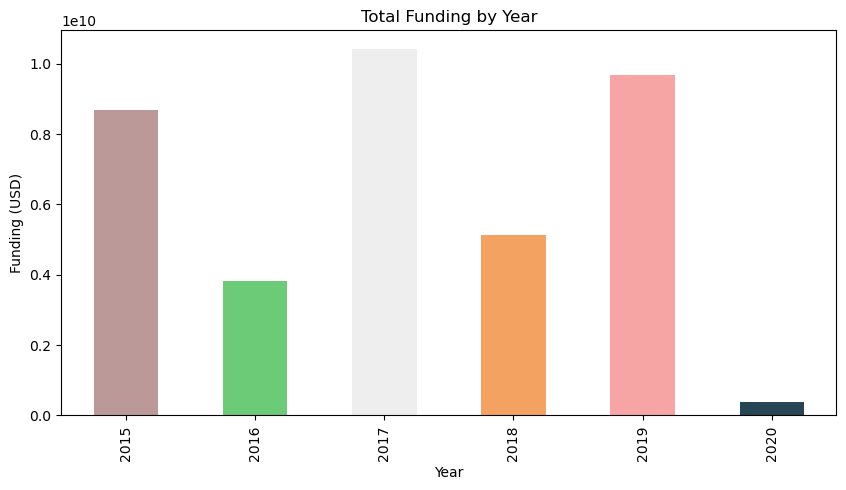

In [531]:
funding_by_year = df.groupby('Year')['Amount_in_USD'].sum().sort_index()
funding_by_year.plot(kind='bar', figsize=(10,5),color =["#BB9999","#6BCB77","#EEEEEE","#F4A261","#F7A4A4","#264653"],title='Total Funding by Year')
plt.ylabel('Funding (USD)')
plt.show()

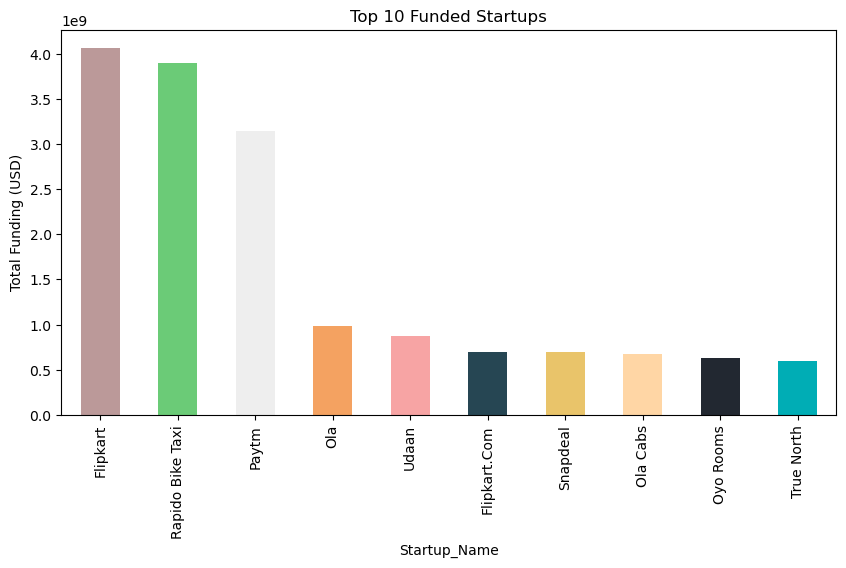

In [532]:
top_startups = df.groupby('Startup_Name')['Amount_in_USD'].sum().nlargest(10)
top_startups.plot(kind='bar', figsize=(10,5),color =["#BB9999","#6BCB77","#EEEEEE","#F4A261","#F7A4A4","#264653","#E9C46A","#FFD6A5","#222831","#00ADB5"],
                  title='Top 10 Funded Startups')
plt.ylabel('Total Funding (USD)')
plt.show()

In [533]:
df.to_csv('Cleaned_Startup_Funding.csv', index=False)
print("\nCleaned data saved to 'Cleaned_Startup_Funding.csv'")


Cleaned data saved to 'Cleaned_Startup_Funding.csv'


In [534]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///startup_funding.db')
df.to_sql('funding', engine, index=False, if_exists='replace')

3044

In [535]:
conn = sqlite3.connect('startup_funding.db')
cursor = conn.cursor()


In [536]:
df.to_sql("funding", conn, if_exists="replace", index=False)

3044

In [537]:
print(pd.read_sql("SELECT COUNT(*) as rows FROM funding;", conn))


   rows
0  3044


In [538]:
query1 = """
SELECT
    Investors_Name,
    COUNT(*) AS total_rounds,
    SUM(Amount_in_USD) AS total_funding
FROM funding
WHERE Amount_in_USD IS NOT NULL
GROUP BY Investors_Name
ORDER BY total_funding DESC
LIMIT 10;
"""
top_investors = pd.read_sql_query(query1, conn)
top_investors


,Investors_Name,total_rounds,total_funding
0,Westbridge Capital,2,3.952000e+09
1,Softbank,1,2.500000e+09
2,Softbank Group,3,1.467000e+09
3,"Microsoft, Ebay, Tencent Holdings",1,1.400000e+09
4,Vijay Shekhar Sharma,4,1.000150e+09
5,Steadview Capital And Existing Investors,1,7.000000e+08
6,"Alibaba Group, Ant Financial",1,6.800000e+08
7,Nan,24,6.241060e+08
8,Softbank Vision Fund,3,6.010000e+08
9,"Altimeter Capital, Dst Global",1,5.850000e+08


In [539]:
query2 = """
SELECT
    Year,
    COUNT(*) AS num_rounds,
    ROUND(AVG(Amount_in_USD), 2) AS avg_funding_per_round,
    SUM(Amount_in_USD) AS total_funding
FROM funding
WHERE Year IS NOT NULL AND Amount_in_USD IS NOT NULL
GROUP BY Year
ORDER BY Year;
"""
yearly_avg = pd.read_sql_query(query2, conn)
yearly_avg

,Year,num_rounds,avg_funding_per_round,total_funding
0,2015,936,9266049.54,8.673022e+09
1,2016,993,3855074.13,3.828089e+09
2,2017,687,15180945.75,1.042931e+10
3,2018,310,16523768.93,5.122368e+09
4,2019,111,87266455.27,9.686577e+09
5,2020,7,55743893.43,3.902073e+08


In [540]:
query3 = """
SELECT
    City__Location AS City,
    Industry_Vertical AS Industry,
    COUNT(*) AS num_rounds,
    SUM(Amount_in_USD) AS total_funding
FROM funding
WHERE City__Location IS NOT NULL
GROUP BY city, industry
ORDER BY total_funding DESC
LIMIT 20;
"""
city_industry = pd.read_sql_query(query3, conn)
city_industry

,City,Industry,num_rounds,total_funding
0,Bangalore,Ecommerce,68,6.005765e+09
1,Bengaluru,Transportation,1,3.900000e+09
2,Bangalore,Consumer Internet,262,1.793124e+09
3,Mumbai,Finance,16,1.360000e+09
4,Mumbai,Consumer Internet,200,1.307540e+09
5,Nan,Nan,171,1.231811e+09
6,Gurgaon,Consumer Internet,99,1.094815e+09
7,Noida,Fintech,1,1.000000e+09
8,Bangalore,Online Marketplace,1,7.000000e+08
9,New Delhi,E-Commerce & M-Commerce Platform,1,6.800000e+08


In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr_No              3044 non-null   int64         
 1   Date_dd_mm_yyyy    3044 non-null   datetime64[ns]
 2   Startup_Name       3044 non-null   object        
 3   Industry_Vertical  3044 non-null   object        
 4   SubVertical        3044 non-null   object        
 5   City__Location     3044 non-null   object        
 6   Investors_Name     3044 non-null   object        
 7   InvestmentnType    3044 non-null   object        
 8   Amount_in_USD      3044 non-null   float64       
 9   Remarks            419 non-null    object        
 10  Year               3044 non-null   int32         
 11  Month              3044 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(7)
memory usage: 261.7+ KB


In [542]:
query4 = """
SELECT
    Startup_Name,
    COUNT(DISTINCT Investors_Name) AS Unique_Investors,
    SUM(Amount_in_USD) AS total_raised
FROM funding
GROUP BY Startup_Name
HAVING Unique_Investors > 1
ORDER BY Unique_Investors DESC, total_raised DESC
LIMIT 20;
"""
multi_investor = pd.read_sql_query(query4, conn)
multi_investor

,Startup_Name,Unique_Investors,total_raised
0,Ola Cabs,8,6.697000e+08
1,Swiggy,8,2.705000e+08
2,Paytm,7,3.148950e+09
3,Blackbuck,6,2.683800e+08
4,Meesho,6,1.896000e+08
5,Lendingkart,6,1.461500e+08
6,Nobroker,6,7.140000e+07
7,Lenskart,6,6.565000e+07
8,Urbanclap,6,6.070000e+07
9,Healthifyme,6,2.500000e+07


In [543]:
# CREATING A VIEW
conn.execute("""
CREATE VIEW IF NOT EXISTS v_funding_summary AS
SELECT
    Year,
    Industry_Vertical,
    City__Location,
    SUM(Amount_in_USD) AS total_funding,
    COUNT(*) AS num_rounds
FROM funding
WHERE Amount_in_USD IS NOT NULL
GROUP BY Year, industry_vertical, City__Location;
""")
conn.commit()


In [545]:
print("✅ SQL View 'v_funding_summary' created.")

✅ SQL View 'v_funding_summary' created.


In [546]:
conn.close()
print("SQLite database connection closed.")


SQLite database connection closed.
